# 120years Of Olympics - Data Analysis Project

## 1. Introduction

The Olympics is a global multi-sport event held every four years, where athletes from around the world compete for medals in various sports. This dataset spans over 120 years of Olympic history, capturing athletes’ participation, medal counts, and event details. It allows analysis of trends in countries’ performances, top athletes, and gender participation over time.

## 2. Importing Libraries and Dataset

In [1]:
#importing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#loading Data Set and displaying first 10 values of Data Set

df = pd.read_csv("athlete_events.csv")
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


## 3. Data Understanding and Cleaning

In [3]:
#checking column names

df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
print(f"Data Set has {df.shape[0]} rows and {df.shape[1]} columns")

Data Set has 271116 rows and 15 columns


In [5]:
#checking basic info of data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
#displaying rows which have atleast 1 null value

df[df.isnull().any(axis=1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
#dealing with null values

df["Height"].fillna(df["Height"].mean(), inplace = True)
df["Weight"].fillna(df["Weight"].mean(), inplace = True)
df["Age"].fillna(df["Age"].mean(), inplace = True)
df["Age"] = df["Age"].astype(int)
df["Medal"].fillna(0, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


In [8]:
#checking for duplicated value

df.duplicated().sum()

np.int64(1385)

In [9]:
#displaying duplicated rows

df[df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27,175.33897,70.702393,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",0
4282,2449,William Truman Aldrich,M,48,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",0
4283,2449,William Truman Aldrich,M,48,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",0
4862,2777,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",0
4864,2777,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",0
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",0
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",0
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",0


In [10]:
#again checking basic info of data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


In [11]:
#removing duplicated rows and again checking for duplicated rows

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Average And Range Of Athlete Ages

Q. Calculate average and range of athlete ages

In [12]:
average_age = df["Age"].mean()
age_range = df["Age"].max() - df["Age"].min()
print(f"Average age of athletes: {average_age:.2f} years")
print(f"Age range of athletes: {age_range} years")

Average age of athletes: 25.44 years
Age range of athletes: 87 years


### 4.2 Unique Sports, Events & Countries

Q. Number of unique sports, events, and countries

In [13]:
num_sports = df["Sport"].nunique()
num_events = df["Event"].nunique()
num_countries = df["Team"].nunique()

print(f"Number of unique sports: {num_sports}")
print(f"Number of unique events: {num_events}")
print(f"Numbre of unique countries: {num_countries}")

Number of unique sports: 66
Number of unique events: 765
Numbre of unique countries: 1184


### 4.3 Medal Counts By Country, Sport & Year

Q.  Group medal counts by country, sport, and year

In [14]:
# Keep only rows where Medal is not null
medaldata = df.dropna(subset=['Medal'])

# Group by Country, Sport, Year, and Medal type, then count
grouped = medaldata.groupby(['Team', 'Sport', 'Year', 'Medal']).size().unstack(fill_value=0)

#Reset index for a cleaner DataFrame
grouped = grouped.reset_index()
grouped

Medal,Team,Sport,Year,0,Bronze,Gold,Silver
0,30. Februar,Sailing,1952,2,0,0,0
1,A North American Team,Polo,1900,0,4,0,0
2,Acipactli,Sailing,1964,3,0,0,0
3,Acturus,Sailing,1948,2,0,0,0
4,Afghanistan,Athletics,1936,3,0,0,0
...,...,...,...,...,...,...,...
28840,Zimbabwe,Triathlon,2008,1,0,0,0
28841,Zimbabwe,Triathlon,2012,1,0,0,0
28842,Zimbabwe,Weightlifting,1980,1,0,0,0
28843,Zut,Sailing,1908,0,0,0,3


### 4.4 Athlete With The Most Medals

Q. Find the athlete with the most medals

In [15]:
# Group by athlete name and count medals
athlete_medals = medaldata.groupby('Name').size().reset_index(name='Total_Medals')

# Sort descending to find the athlete with most medals
athlete_medals = athlete_medals.sort_values(by='Total_Medals', ascending=False)
print(f"Athlete with the most medals: \n{athlete_medals.head(1)}")

Athlete with the most medals: 
                           Name  Total_Medals
47116  Heikki Ilmari Savolainen            39


### 4.5 Gender Participation

Q. Track gender participation over time

In [16]:
gender_participants = df.groupby(["Year", "Sex"])["Name"].nunique().unstack(fill_value=0)
gender_participants = gender_participants.reset_index()

print(f"Gender Participants Over Time:")
gender_participants

Gender Participants Over Time:


Sex,Year,F,M
0,1896,0,176
1,1900,23,1197
2,1904,6,644
3,1906,6,835
4,1908,44,1980
5,1912,53,2356
6,1920,78,2597
7,1924,169,3396
8,1928,340,3362
9,1932,222,1952


### 4.6 Athletes participated over the years

Q. How many athletes participated over the years?

In [17]:
unique_athlete = df.drop_duplicates(subset = ["Name", "Year"])
unique_athlete_yearly = unique_athlete.groupby("Year")["Name"].nunique().reset_index()
unique_athlete_yearly

,Year,Name
0,1896,176
1,1900,1220
2,1904,650
3,1906,841
4,1908,2024
5,1912,2409
6,1920,2675
7,1924,3565
8,1928,3702
9,1932,2174


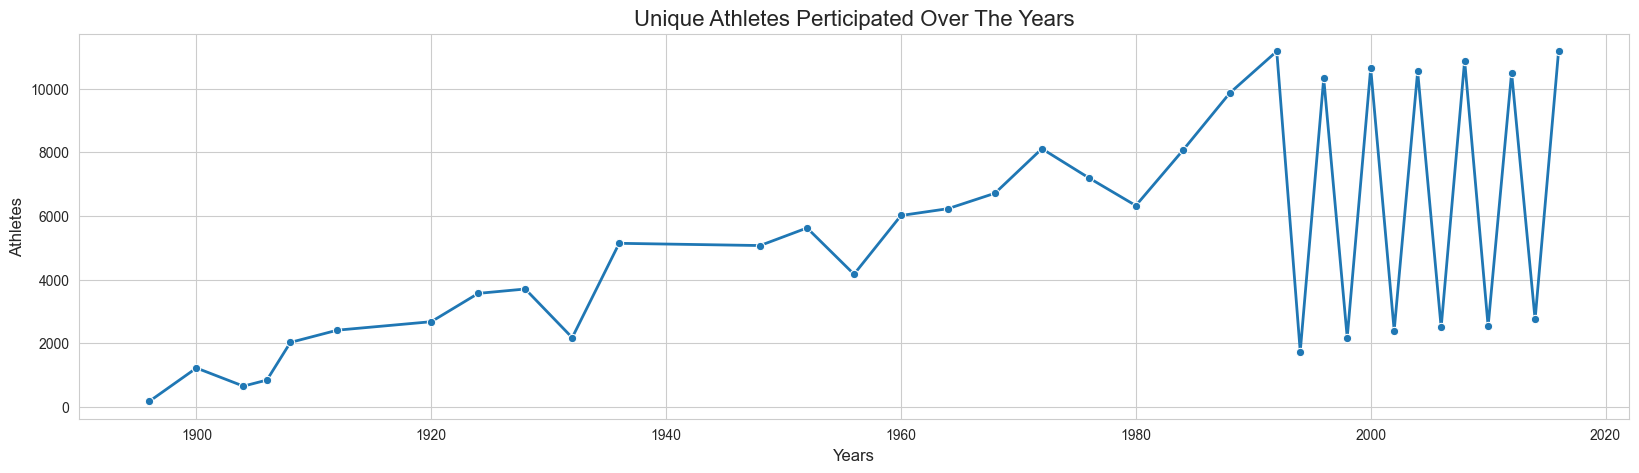

In [18]:
plt.figure(figsize =(20,5))
plt.title("Unique Athletes Perticipated Over The Years", fontsize = 16)
sns.lineplot(data = unique_athlete_yearly, x="Year", y="Name", marker = "o", linewidth = 2)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Athletes", fontsize = 12)
plt.show()

The trend indicates a steady growth in athlete participation from 1900 onward, with fluctuations in some years.

### 4.7 Countries With The Most Medals

Q. Top 10 countries with the most medals

In [19]:
medalcounts = medaldata.groupby("Team")["Medal"].count().reset_index()
top10countries = medalcounts.sort_values(by = "Medal", ascending = False).head(10)
top10countries

,Team,Medal
1095,United States,17598
361,France,11817
412,Great Britain,11264
506,Italy,10213
398,Germany,9230
173,Canada,9226
513,Japan,8269
1010,Sweden,8004
65,Australia,7512
476,Hungary,6492


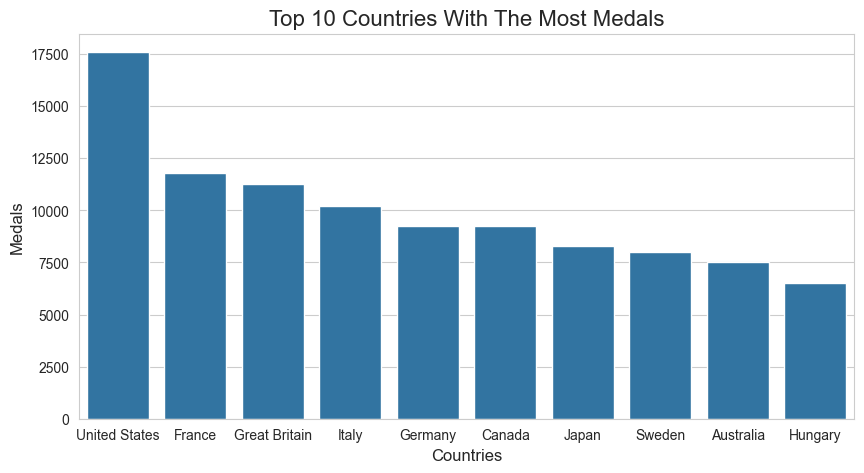

In [20]:
plt.figure(figsize = (10,5))
sns.barplot(data=top10countries, x="Team", y ="Medal")
plt.title("Top 10 Countries With The Most Medals", fontsize = 16)
plt.xlabel("Countries",fontsize = 12)
plt.ylabel("Medals",fontsize = 12)
plt.show()

The above trend shows that the United States has the highest number of medals in the Olympics.

### 4.8 Sports Having The Most Events & Medals

Q. Which sports have the most events and medals?

In [21]:
sports_events = df.groupby("Sport")["Event"].nunique().reset_index()
sports_events = sports_events.sort_values("Event", ascending=False).head(10)
sports_events


,Sport,Event
47,Shooting,83
5,Athletics,83
54,Swimming,55
19,Cycling,44
46,Sailing,38
65,Wrestling,30
4,Art Competitions,29
3,Archery,29
27,Gymnastics,27
14,Canoeing,27


In [22]:
sports_medals = df["Medal"].notna().groupby(df["Sport"]).sum().reset_index()
sports_medals = sports_medals.sort_values("Medal", ascending=False).head(10)
sports_medals

,Sport,Medal
5,Athletics,38624
27,Gymnastics,26707
54,Swimming,23195
47,Shooting,11448
19,Cycling,10827
22,Fencing,10735
43,Rowing,10595
17,Cross Country Skiing,9133
1,Alpine Skiing,8829
65,Wrestling,7154


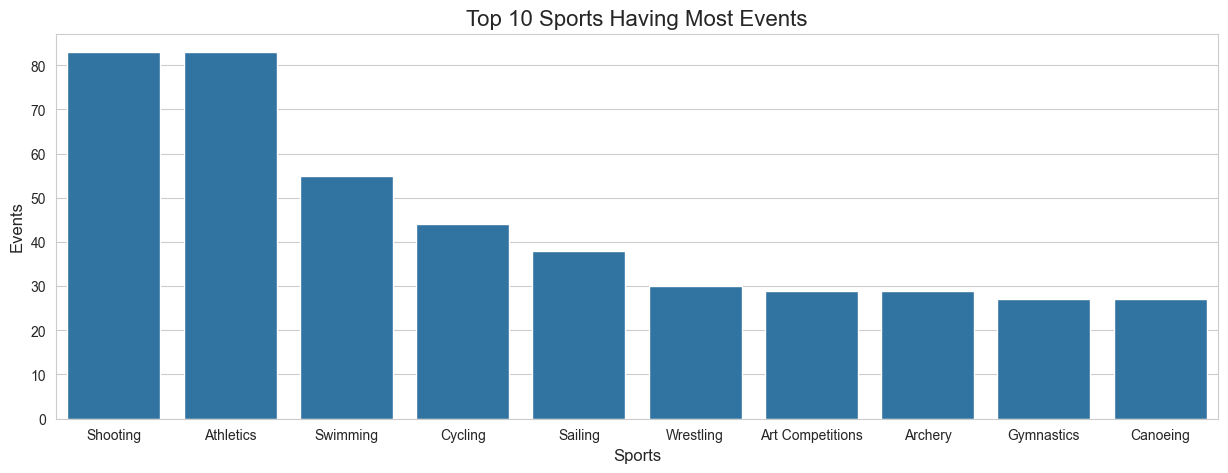

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=sports_events, x="Sport", y="Event")
plt.title("Top 10 Sports Having Most Events", fontsize=16)
plt.xlabel("Sports", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.show()

The above trend shows that the sport Shooting has the highest number of events among all sports in the dataset.

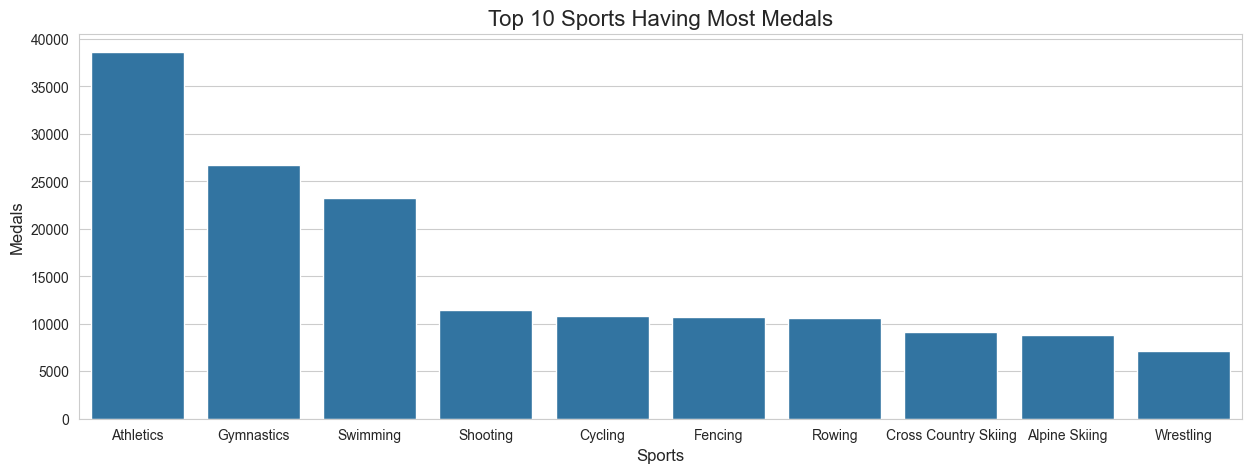

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=sports_medals, x="Sport", y="Medal")
plt.title("Top 10 Sports Having Most Medals", fontsize = 16)
plt.xlabel("Sports", fontsize=12)
plt.ylabel("Medals", fontsize=12)
plt.show()

The above trend shows that the sport Athletics has the highest number of medals among all sports in the dataset.

## 5. Key Insights

1. Athlete participation has generally increased over time, showing the growing scale and reach of the Olympics.
2. The United States leads all countries with the highest overall medal count.
3. Shooting has the largest number of events, indicating a variety of disciplines within the sport.
4. Athletics records the highest total medals, reflecting its range of competitive events.

## 6. References

1. Dataset Source:

   ICC Cricket World Cup 2019 Dataset, Kaggle: [ https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results ]

3. Python Libraries Used:

   a. Numpy
   b. Pandas
   c. Matplotlib
   d. Seaborn